In [1]:
import netCDF4 as nc
# from numpy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *
from calc_LRM_metric import *
from calc_LRMobs_metric import *
from fitLRMobs import *

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *

from Aploting_Sep11 import *


In [2]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# basic setting:

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50

deck3 = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
         FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
          GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]

deck3_nas = ['CanESM5', 'E3SM10', 'CESM2FV2', 'CESM2', 'CNRMCM61', 'CESM2WACCMFV2', 'CNRMESM21', 'NESM3', 'IPSLCM6ALR', 'CESM2WACCM', 'MIROCESM', 'TaiESM1', 'ECEarth3Veg', 'CNRMCM61HR', 'ECEarth3', 
         'FGOALSs2', 'IPSLCM5ALR', 'CSIRO_Mk360', 'BNUESM', 'GFDLCM3', 'GFDLCM4', 'SAM0', 'CanESM2', 'MPIESMLR', 'CMCCCM2SR5', 'MPIESMMR', 'FGOALSg2', 'BCCESM1', 'CNRMCM5', 'AWICM11MR', 'MRIESM20', 
          'GISSE21H', 'MPIESM12LR', 'CCSM4', 'NorESM1M', 'FGOALSg3', 'bcccsm11', 'MIROC5', 'GISSE21G', 'MIROCES2L', 'MRICGCM3', 'MIROC6', 'NorESM2MM', 'GFDLESM2M', 'GFDLESM2G', 'GISSE22G', 'GISSE21H', 'CAMSCSM1', 'GISSE2R', 'INM_CM48']
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

#.. current model #: 18 + 12 (except: '19')
path_data = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/' 

In [4]:
# Plotting Fig8th: Annual series of GCMs’ LWP vs. P - E averaged over 40 — 85S;s

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}

output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# # Predict metric data in specific units:
# output_2lrm_mon_bin_LWPpredi_PI = {}
# output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    # folder_2lrm = glob.glob(path_data+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    
    # folder_2lrm = glob.glob(path_data + deck2[i]['modn'] + '_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest' + '*' + '_dats.npz')
    
    folder_2lrm = glob.glob(path_data + deck2[i]['modn'] + '__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest'+ '*' + '_dats.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        
        folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
    
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    # output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    # output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']
    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annual data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-3.63_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-12.91_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.28_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.42_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.35_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-1.55_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-4.57_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lr

### Fig S6:
The Response of model LWP to moisture convergence for the first 150 yr of {abrupt4xCO_{2}} simulations:

In [5]:
# Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Warm

sigmaalbedo_r1 = full((len(deck2)), 0.00) # Cold
sigmaalbedo_r2 = full((len(deck2)), 0.00) # Warm

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Warm
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

sigmaalbedo_ALL = full((len(deck2)), 0.00) # Southern Ocean as a whole

In [6]:
for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaalbedo_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Cold_PI])
    sigmaalbedo_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    sigmaalbedo_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][logical_or(ind_Hot_PI, ind_Cold_PI)])

print(sigmaXi_r1.shape)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


(50, 4)


In [7]:
def target_func_poly2(x, a, b, c): 
        '''
        2d polynomial fit
        '''
        y = a* x**2 + b* x**1 + c
        return y


def target_func_poly1(x, a, b):
        '''
        linear fit
        '''
        y = a* x + b
        return y

[35.51780129 15.46877224  1.82423264  1.77151471  1.69605615 12.14523864
 45.06506393 44.96403036 34.66573671 24.15477415 42.28747225  5.75500319
  7.12320308 11.02851266 12.80958393 17.53273212  4.05571919 17.35009776
 17.97079432  4.71968974  1.30747037 11.60684336 10.60799985  6.67803496
  6.62310351 34.22990298 14.24027039 11.64044492  2.59056416  5.16403192
 37.99977132 36.34100842 28.53152481  9.93845294 28.13888319  9.08908609
 20.97083346 12.521576   13.15543819 17.00036056 24.29426816  8.90835512
 20.16420214 25.95726175 16.00589509 17.97891042 18.30238975 35.98201496
 17.4593588  17.56956424]


Text(0, 0.5, '$ \\Delta\\ LWP,\\ [g/m^{2}]$')

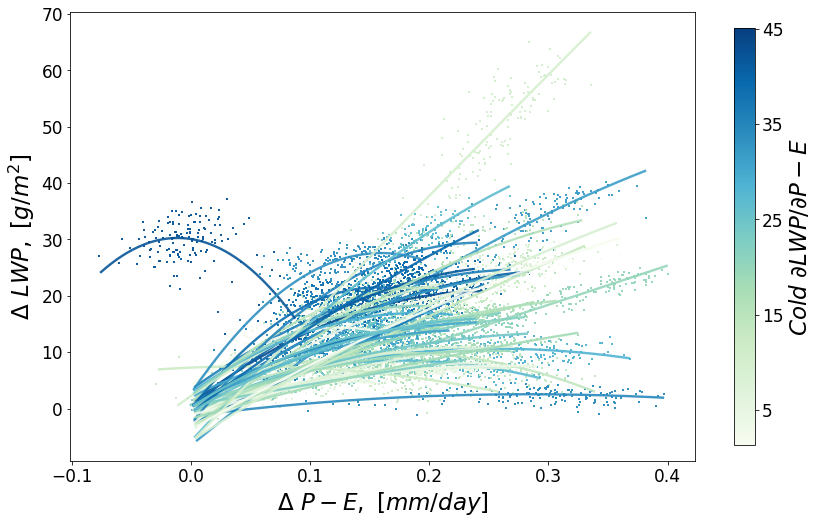

In [13]:
# import Mark's data for CMIP5, CMIP6 models' EffCS, SWCLD..:
import json

f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

# read through CMIP5 + CMIP6 EffCS and SWfb values:
EffCS = {}
SWCLD = {}

for i in range(len(deck_nas2)):

    if deck2[i]['cmip'] == 'cmip5':
        EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
        SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

    if deck2[i]['cmip'] == 'cmip6':

        if deck2[i]['modn'] == 'EC-Earth3':
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
        else:
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

# Plotting: 

ECS = []
for i in range(len(deck_nas2)):
    ECS.append(EffCS[deck_nas2[i]])
ECS = np.asarray(ECS)

sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
# print(sorted_EffCS_index)
# print(ordinal_EffCS_index)

stcoef_qcon11 = []
stcoef_qcon12 = []
for i in arange(len(deck_nas2)):

    stcoef_qcon11.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][1])
    stcoef_qcon12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][1])

stcoef_qcon11 = asarray(stcoef_qcon11) * 1000. * sigmaXi_r1[:,1]
stcoef_qcon12 = asarray(stcoef_qcon12) * 1000. * sigmaXi_r2[:,1]
print(stcoef_qcon12)

sorted_dLWPdP_E2_index = sorted(range(50), key = lambda index:stcoef_qcon11[index])
ordinal_dLWPdP_E2_index = [sorted_dLWPdP_E2_index.index(i) for i in range(50)]

# Colors:
Blues_colormap = matplotlib.cm.get_cmap("GnBu") # coolwarm
COLORS = [Blues_colormap(x) for x in np.linspace(0., 0.95, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
# print(COLORS)
# Create My Own colormap:
cmap = matplotlib.cm.GnBu
norm = matplotlib.colors.Normalize(vmin = min(stcoef_qcon12), vmax = max(stcoef_qcon12))

# Calc the 40--85 averaged annual changes in LWP; globally averaged annually changes in GMT; colored by \Delta LWP/ \Delta GMT;

an_delta_LWP = np.full((len(deck_nas2), 150), 0.0)  # annual time series of 40 -- 85 averaged changes in LWP for GCMs;
an_delta_P_E = np.full((len(deck_nas2), 150), 0.0)  # annual time series of 40 -- 85 averaged changes in P - E for GCMs;
an_delta_GMT = np.full((len(deck_nas2), 150), 0.0)  # annual time series of globally changes in GMT for GCMs;

mean_state_LWP = np.full(len(deck2), 0.0)
mean_state_P_E = np.full(len(deck2), 0.0)
for i in range(len(deck_nas2)):

    an_delta_LWP[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range)))
    an_delta_P_E[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['p_e_yr_bin'], y_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'], y_range, x_range)))
    an_delta_GMT[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range)))

    mean_state_LWP[i] = np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range))
    mean_state_P_E[i] = np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range))

    
# Plotting:

import matplotlib
parameters = {'axes.labelsize': 23, 'legend.fontsize': 15, 
         'axes.titlesize': 21,  'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(1, 1, figsize=(14, 8.25))

for i in range(len(deck2)):
    
    #if (i != 30):
    x = an_delta_P_E[i] - np.mean(an_delta_P_E[i][0])
    y = 1000. * (an_delta_LWP[i] - np.mean(an_delta_LWP[i][0])) # + mean_state_LWP[i]

    # ax.scatter(x, an_delta_LWP[i] + mean_state_LWP[i], marker = 'x', s= 1)
    # ax.scatter(x[0], y[0], marker = 'o', s = 18, edgecolors = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth =2, facecolors = 'none')
    sca1 = ax.scatter(x, y, c = COLORS[ordinal_dLWPdP_E2_index[i]], marker = 's', s= 1)
    POPT_gmtLWP, POCV_gmtLWP = curve_fit(target_func_poly2, x, y)
    # print(POPT_gmtLWP)

    x_fit = np.linspace(min(x), max(x), 150)
    # ax.plot(x_fit, POPT_gmtLWP[0] * x_fit + POPT_gmtLWP[1], color = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth = 2.2, linestyle = '-', alpha = 0.9, zorder = 99)
    ax.plot(x_fit[2:], POPT_gmtLWP[0] * x_fit[2:]**2 + POPT_gmtLWP[1] * x_fit[2:]**1 + POPT_gmtLWP[2], color = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth = 2.40, linestyle = '-', alpha = 0.9, zorder = 99)  

cbar = plt.colorbar(mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation = 'vertical', shrink = 0.93, label = "$ Cold\ {\partial LWP}/{\partial {P - E}}$")
cbar.set_ticks(np.linspace(5, 45, 5, endpoint = True))
# cbar.set_ticklabels(['0', '10', '20', '30', '40', '50'])  # VERTICAL colorbar

# Plot setting:

# ax.set_xlim(-0.10, 0.5)
# ax.set_xticks(arange(-0.10, 0.60, 0.10))
# ax.set_ylim(-0.02, 0.08)
# ax.set_yticks(arange(-0.02, 0.08, 0.02))
ax.set_xlabel(r"$ \Delta\ P-E,\ [mm/day]$")
ax.set_ylabel(r"$ \Delta\ LWP,\ [g/m^{2}]$")

# ax.set_title(r"$LWP\ _{40^{o} -85^{o} S}$")
# 
# plt.savefig(path_plot + "Fig_S6.jpg", bbox_inches = 'tight', dpi = 500)